<a href="https://colab.research.google.com/github/rpscdev/App/blob/main/montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimated Probability of Winning: 0.5820
Theoretical Probability of Winning: 0.5833


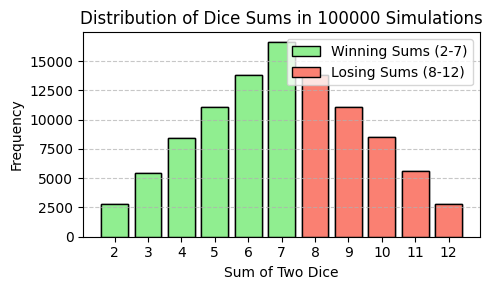

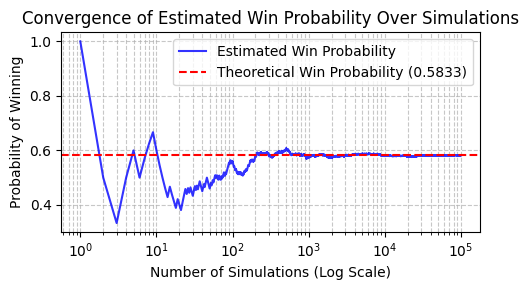

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def monte_carlo_dice_bet(num_simulations):
    wins = 0
    all_sums = []
    simulation_outcomes = []

    for _ in range(num_simulations):
        die1 = np.random.randint(1, 7)
        die2 = np.random.randint(1, 7)
        current_sum = die1 + die2
        all_sums.append(current_sum)
        if 2 <= current_sum <= 7:
            wins += 1
            simulation_outcomes.append(True)
        else:
            simulation_outcomes.append(False)

    estimated_win_probability = wins / num_simulations
    sum_counts = Counter(all_sums)

    return estimated_win_probability, sum_counts, simulation_outcomes

NUM_SIMULATIONS = 100000

estimated_win_prob, sum_counts, simulation_outcomes = monte_carlo_dice_bet(NUM_SIMULATIONS)

theoretical_win_prob = 21 / 36

print(f"Estimated Probability of Winning: {estimated_win_prob:.4f}")
print(f"Theoretical Probability of Winning: {theoretical_win_prob:.4f}")

plt.figure(figsize=(5, 3))
sums_range = sorted(sum_counts.keys())
counts = [sum_counts[s] for s in sums_range]

plt.bar(sums_range, counts, color='lightgray', edgecolor='black')

winning_sums = [s for s in sums_range if 2 <= s <= 7]
for s in winning_sums:
    plt.bar(s, sum_counts[s], color='lightgreen', edgecolor='black',
            label='Winning Sums (2-7)' if s == winning_sums[0] else "")

losing_sums = [s for s in sums_range if 8 <= s <= 12]
for s in losing_sums:
    plt.bar(s, sum_counts[s], color='salmon', edgecolor='black',
            label='Losing Sums (8-12)' if s == losing_sums[0] else "")

plt.title(f'Distribution of Dice Sums in {NUM_SIMULATIONS} Simulations')
plt.xlabel('Sum of Two Dice')
plt.ylabel('Frequency')
plt.xticks(sums_range)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))

cumulative_wins = np.cumsum(simulation_outcomes)
cumulative_simulations_count = np.arange(1, NUM_SIMULATIONS + 1)
cumulative_win_prob = cumulative_wins / cumulative_simulations_count

plt.plot(cumulative_simulations_count, cumulative_win_prob,
         label='Estimated Win Probability', color='blue', alpha=0.8)

plt.axhline(theoretical_win_prob, color='red', linestyle='--',
            label=f'Theoretical Win Probability ({theoretical_win_prob:.4f})')

plt.xscale('log')
plt.title('Probability of Estimated Win Probability get more stable Over more Simulations')
plt.xlabel('Number of Simulations (Log Scale)')
plt.ylabel('Probability of Winning')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
